# Investigate, wrangle, add new data to the dataframe, filter and correlate

The following data file contains data about student scores in math, reading and writing.  The exam scores are assumed to be percentages. It also contains data about gender, ethnicity, parental education, whether the student qualifies for free school food and whether or not the student has taken a preparation course for the exams.  The data set has already been cleaned. 

1.  Investigate the data set.

2.  Create numpy arrays to hold each of the three sets of scores.  
Create a new numpy array to hold the average exam score (of the three scores for each student)
Add the new numpy array as a new column in the dataframe.

3.  Filter the original dataset into a new dataframe containing just the females.  Calculate the average exam scores for all rows in this new dataframe and then find the mean of the average column.

4.  Do the same for the males.

5.  Use the original dataset to find the correlation coefficient for reading and maths.  How closely do they correlate?  Write what you find in a text box below the code.

6.  Do the same for reading and writing. What do you find?

7.  You might want to filter on different criteria and check correlation (e.g. those on free school meals, or those who had prepared, etc)







The dataset can be accessed here:  https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv.  This is a .csv file.

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

The average score for female is  70.81989247311829
The average score for male is  65.99272486772489
The average score for free /reduced lunch is  62.33994334277618
The average score for male is  71.68624420401852


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is 

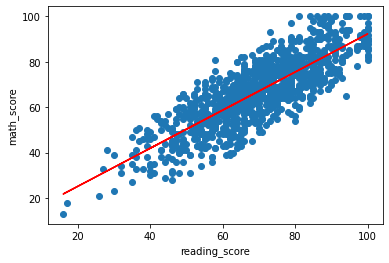

The correlation between reading scores and Maths scores is :  0.8145975152425367


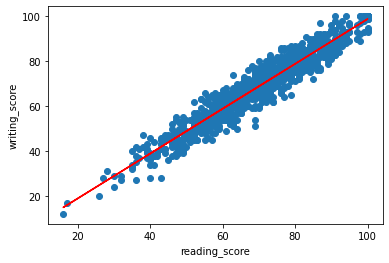

The correlation between reading scores and writing scores is ::  0.9567686336066267


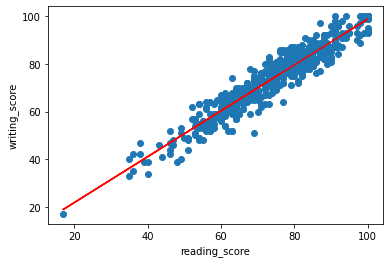

The correlation between reading scores and Writing scores for Female is:  0.9518198592169911


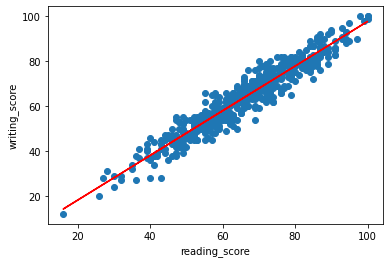

The correlation between reading scores and Writing scores for Male is:  0.9557073320386953


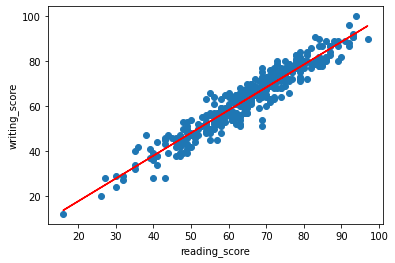

The correlation between reading scores and Writing scores for students with Free lunch is:  0.9551470512026966


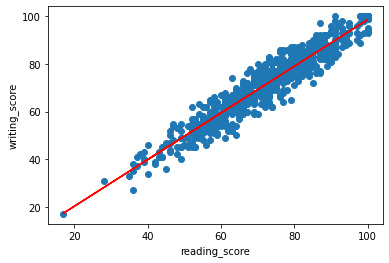

The correlation between reading scores and Writing scores for students with Standard lunch is:  0.9534119437378282


In [9]:
from pandas.core.indexing import convert_from_missing_indexer_tuple
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"
df_scores = pd.read_csv(url)

#FUNCTION 1: 
# This function creates an array to hold a set of scores.
def assign_score(df,column):
  score=np.array(df[column],np.int64)
  return score

math_score=assign_score(df_scores,"math_score")
reading_score=assign_score(df_scores,"reading_score")
writing_score=assign_score(df_scores,"writing_score")

#FUNCTION 2
# This function calculates the number of arguments in a functions
def no_of_argu(*args):
    return(len(args))

#FUNCTION 3: 
# This function creates a new  array in the dataframe to hold the average exam score
def calculate_average(df,a,b,c):
  number=no_of_argu(df,a,b,c)-1
  average= (a+b+c)/number
  df["Average_score"]=average.tolist()   
  return  df
Av_score=calculate_average(df_scores,math_score,reading_score,writing_score)

#FUNCTION 4: 
# This function filters a dataframe depending on the values in a singl column
def filtered_df_average(df,col,criteria):
  filtered_df=df[df[col]==criteria]  
  return filtered_df

#FUNCTION 5: 
# This function calculates the correlation coefficient between two columns in two datasets
import matplotlib.pyplot as plt
from scipy.stats import linregress
def correlation(df1,col1,df2,col2):
  x=df1[col1]
  y=df2[col2]
  coeff=np.corrcoef(x,y) 

  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.scatter(x,y)
  regression = linregress(x,y)
  slope = regression.slope
  intercept = regression.intercept
  plt.plot(x, slope*x + intercept,color='red')
  plt.show()
  return coeff


#Calculate the average score for Females and for Males
filtered_f=filtered_df_average(Av_score,"gender","female")
average_Score_female=filtered_f.mean()
print("The average score for female is ",average_Score_female[3])

filtered_m=filtered_df_average(Av_score,"gender","male")
average_Score_male=filtered_m.mean()
print("The average score for male is ",average_Score_male[3])

#filter on lunch
filtered_freeLunch=filtered_df_average(Av_score,"lunch","free/reduced")
average_Score_freeLunch=filtered_freeLunch.mean()
print("The average score for students with free /reduced lunch is ",average_Score_freeLunch[3])

filtered_standardLunch=filtered_df_average(Av_score,"lunch","standard")
average_Score_standardLunch=filtered_standardLunch.mean()
print("The average score for students with standard lunch is ",average_Score_standardLunch[3])

#Correlations
corr_reading_math= correlation(df_scores,"reading_score",df_scores,"math_score")
print("The correlation between reading scores and Maths scores is : ",corr_reading_math[0,1]) #instead of printing, you can just do that

corr_reading_writing= correlation(df_scores,"reading_score",df_scores,"writing_score")
print("The correlation between reading scores and writing scores is :: ",corr_reading_writing[0,1]) 

corr_reading_writing_female= correlation(filtered_f,"reading_score",filtered_f,"writing_score")
print("The correlation between reading scores and Writing scores for Female is: ",corr_reading_writing_female[0,1])

corr_reading_writing_male= correlation(filtered_m,"reading_score",filtered_m,"writing_score")
print("The correlation between reading scores and Writing scores for Male is: ",corr_reading_writing_male[0,1])

corr_reading_writing_freeLunch= correlation(filtered_freeLunch,"reading_score",filtered_freeLunch,"writing_score")
print("The correlation between reading scores and Writing scores for students with Free lunch is: ",corr_reading_writing_freeLunch[0,1])

corr_reading_writing_standardLunch= correlation(filtered_standardLunch,"reading_score",filtered_standardLunch,"writing_score")
print("The correlation between reading scores and Writing scores for students with Standard lunch is: ",corr_reading_writing_standardLunch[0,1])
#You might want to filter on different criteria and check correlation (e.g. those on free school meals, or those who had prepared, etc)
#draw conclusions